
# Monte Carlo Simulation for Value at Risk (VaR) and Expected Shortfall

Calculating **Value at Risk (VaR)** and **Expected Shortfall (ES)** for a portfolio of assets.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import ipywidgets as widgets
from ipywidgets import interact


In [2]:

# Define tickers and period for my favorite stocks
tickers = ["VOO", "QQQ", "AVGO", "PLTR", "META"]
start = "2023-01-01"
end = "2025-07-01"

# Download adjusted close prices (auto_adjust=False ensures 'Adj Close' exists)
data = yf.download(tickers, start=start, end=end, auto_adjust=False)["Adj Close"]
data.head()


[*********************100%***********************]  5 of 5 completed


Ticker,AVGO,META,PLTR,QQQ,VOO
Date,,,,,
2023-01-03,53.020180,123.975731,6.39,260.130615,337.761108
2023-01-04,53.667744,126.589615,6.58,261.369873,340.193085
2023-01-05,53.167690,126.162254,6.32,257.278290,336.477631
2023-01-06,56.368187,129.223373,6.40,264.379517,344.130463
2023-01-09,55.262714,128.676743,6.50,266.091034,343.879547


In [3]:

# Calculate daily returns
returns = data.pct_change().dropna()

# Equal-weighted portfolio
weights = np.ones(len(tickers)) / len(tickers)
portfolio_returns = returns.dot(weights)
portfolio_returns.head()


,0
Date,
2023-01-04,0.014999
2023-01-05,-0.015757
2023-01-06,0.029493
2023-01-09,-0.000494
2023-01-10,0.014030


In [4]:

# Parameters
num_simulations = 100000

# Mean and std of portfolio returns
mu = portfolio_returns.mean()
sigma = portfolio_returns.std()

# Simulate losses (negative returns)
simulated_returns = np.random.normal(mu, sigma, num_simulations)
losses = -simulated_returns


In [5]:

# Calculate 95% VaR
confidence_level = 95
var_95 = np.percentile(losses, 100-confidence_level)

print(f"Value at Risk (95% confidence): {-var_95:.4f}")


Value at Risk (95% confidence): 0.0345


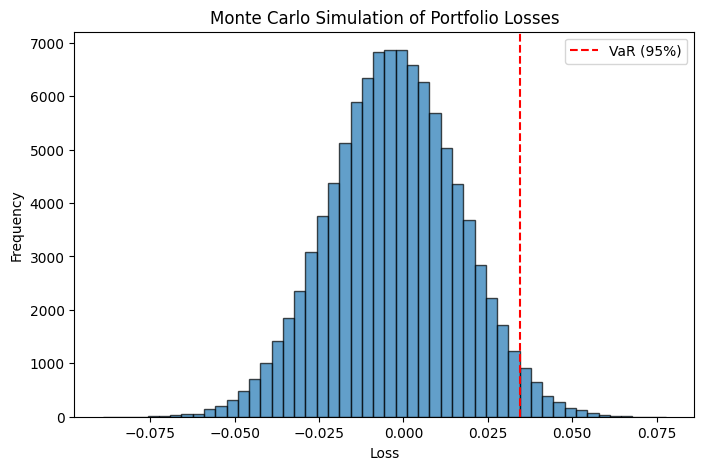

In [6]:

# Plot distribution of losses
plt.figure(figsize=(8,5))
plt.hist(losses, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(-var_95, color="red", linestyle="--", label="VaR (95%)")
plt.title("Monte Carlo Simulation of Portfolio Losses")
plt.xlabel("Loss")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [7]:

# Compute Expected Shortfall (Conditional VaR)
es_95 = losses[losses <= -var_95].mean()
print(f"Expected Shortfall at 95% confidence: {es_95:.4f}")


Expected Shortfall at 95% confidence: -0.0039


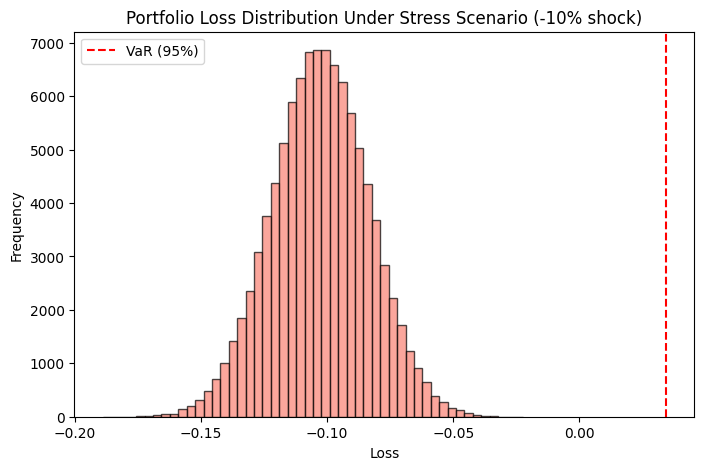

In [8]:

# Stress test: apply a -10% market shock
shock = 0.10
stressed_losses = losses - shock

plt.figure(figsize=(8,5))
plt.hist(stressed_losses, bins=50, alpha=0.7, color='salmon', edgecolor='black')
plt.axvline(-var_95, color="red", linestyle="--", label="VaR (95%)")
plt.title("Portfolio Loss Distribution Under Stress Scenario (-10% shock)")
plt.xlabel("Loss")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [9]:

# Historical VaR at 95%
hist_var_95 = np.percentile(portfolio_returns.values.flatten(), 5)

print(f"Monte Carlo VaR (95%): {-var_95:.4f}")
print(f"Historical VaR (95%): {hist_var_95:.4f}")


Monte Carlo VaR (95%): 0.0345
Historical VaR (95%): -0.0272


In [10]:

# Interactive widget for different confidence levels
def plot_var(confidence=95):
    var_level = np.percentile(losses, 100-confidence)
    plt.figure(figsize=(8,5))
    plt.hist(losses, bins=50, alpha=0.7, edgecolor='black')
    plt.axvline(-var_level, color="red", linestyle="--", label=f"VaR ({confidence}%)")
    plt.title(f"Monte Carlo Simulation - VaR at {confidence}%")
    plt.xlabel("Loss")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

interact(plot_var, confidence=(90, 99));


interactive(children=(IntSlider(value=95, description='confidence', max=99, min=90), Output()), _dom_classes=(…